In [137]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
from ta.trend import IchimokuIndicator
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed,Flatten,Dense

In [128]:
#HYPERPARAMATERS
window_size = 50
batch_size = 64
eval_iters = 500
num_epochs=100

In [ ]:
import pandas as pd

stock_symbol = 'AAPL'
data = pd.read_csv(f'{stock_symbol}_historical_data.csv')

x = data[['High', 'Low', 'Close', 'Adj Close']]
rsi = RSIIndicator(close=x["Close"])
ichi = IchimokuIndicator(high=x["High"],low=x["Low"])
x['rsi'] = rsi.rsi()
x['ichi_b'] = ichi.ichimoku_b()
x['ichi_base'] = ichi.ichimoku_base_line()
x = x.dropna()
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)



In [154]:
X, Y = [], []
for i in range(0, len(x_scaled) - window_size - 1, 1):
    X.append(np.array(x_scaled[i:i + window_size, :]))
    Y.append(np.array(x_scaled[i + window_size, 2])) 
train_X,test_X,train_label,test_label = X[:-30],X[-30:],Y[:-30],Y[-30:]


In [165]:
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)
train_X = train_X.reshape(-1,7,50,1)
test_X = test_X.reshape(-1,7,50,1)


[[[[0.00364283]
   [0.00360084]
   [0.00365644]
   ...
   [0.00354181]
   [0.00337113]
   [0.00361747]]

  [[0.00367952]
   [0.00365644]
   [0.00309502]
   ...
   [0.00351329]
   [0.0036885 ]
   [0.00365591]]

  [[0.00364613]
   [0.0030863 ]
   [0.49843181]
   ...
   [0.00400308]
   [0.00389458]
   [0.00396068]]

  ...

  [[0.50545031]
   [0.00378755]
   [0.00405017]
   ...
   [0.00452533]
   [0.0038305 ]
   [0.56577333]]

  [[0.0043997 ]
   [0.00449182]
   [0.00451808]
   ...
   [0.00368428]
   [0.48325466]
   [0.0043997 ]]

  [[0.00461604]
   [0.00431766]
   [0.00416734]
   ...
   [0.46743536]
   [0.00461199]
   [0.00441454]]]


 [[[0.00368343]
   [0.00365067]
   [0.00356362]
   ...
   [0.00354181]
   [0.00337113]
   [0.00361239]]

  [[0.0035851 ]
   [0.0035069 ]
   [0.00296845]
   ...
   [0.00351329]
   [0.00428975]
   [0.00390507]]

  [[0.00429327]
   [0.00363408]
   [0.67159178]
   ...
   [0.00412232]
   [0.00400998]
   [0.00410506]]

  ...

  [[0.62524754]
   [0.0038966 ]
   [0.0

In [150]:
model = Sequential ([
    TimeDistributed(Conv1D(filters=128,kernel_size=1,padding="causal",strides=1,activation="relu",input_shape=[None,50,1])),
    TimeDistributed(MaxPool1D(2)),
    TimeDistributed(Conv1D(filters=256,kernel_size=1,padding="causal",strides=1,activation="relu",input_shape=[None,50,1])),
    TimeDistributed(MaxPool1D(2)),
    TimeDistributed(Conv1D(filters=512,kernel_size=1,padding="causal",strides=1,activation="relu",input_shape=[None,50,1])),
    TimeDistributed(MaxPool1D(2)),
    TimeDistributed(Flatten()),
    Bidirectional(LSTM(200,return_sequences=True)),
    Dropout(0.25),
    Bidirectional(LSTM(200,return_sequences=False)),
    Dropout(0.5),
    Dense(1,activation="linear")
])

/Users/parthgoel/Library/Python/3.12/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [156]:
model.compile(optimizer="adam",loss="mse")

In [143]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_7              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_8              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_9              │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_10             │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_11             │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_12             │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_13             │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [158]:
history = model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=40)

Epoch 1/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - loss: 4.2643e-04 - val_loss: 0.0053
Epoch 2/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 3.6748e-04 - val_loss: 0.0024
Epoch 3/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 104ms/step - loss: 5.2685e-04 - val_loss: 6.3949e-04
Epoch 4/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 4.1343e-04 - val_loss: 0.0022
Epoch 5/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - loss: 3.5608e-04 - val_loss: 0.0015
Epoch 6/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 4.5873e-04 - val_loss: 0.0017
Epoch 7/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 3.4905e-04 - val_loss: 0.0010
Epoch 8/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - loss: 3.9570e-04 - val_loss: 0.0020
Epoch 9/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 3.8470e-04 - val_loss: 0.0044
Epoch 10/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - loss: 4.0674e-04 - val_loss: 0.0011
Epoch 11/40
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - loss: 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


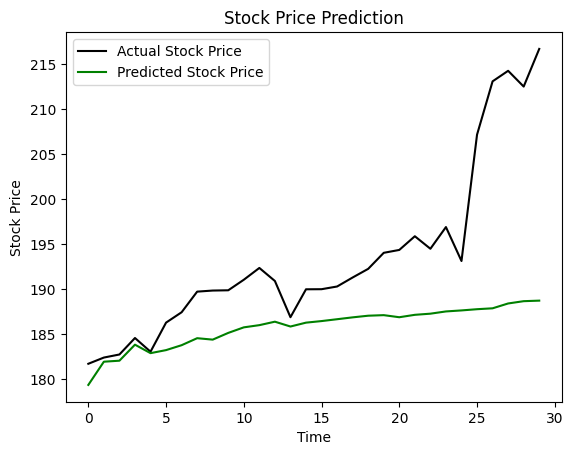

In [159]:
predicted = model.predict(test_X)

# Inverse transform the predictions
predicted = scaler.inverse_transform(np.concatenate([np.zeros((predicted.shape[0], 2)), predicted, np.zeros((predicted.shape[0], 4))], axis=1))[:, 2]

# Inverse transform the test labels
test_label = scaler.inverse_transform(np.concatenate([np.zeros((test_label.shape[0], 2)), test_label.reshape(-1, 1), np.zeros((test_label.shape[0], 4))], axis=1))[:, 2]

# Plot the results
plt.plot(test_label, color='black', label='Actual Stock Price')
plt.plot(predicted, color='green', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [160]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE
mape = mean_absolute_percentage_error(test_label, predicted)

# Convert to percentage
accuracy = 100 - mape * 100

print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')
print(f'Accuracy: {accuracy:.2f}%')


Mean Absolute Percentage Error (MAPE): 3.81%
Accuracy: 96.19%


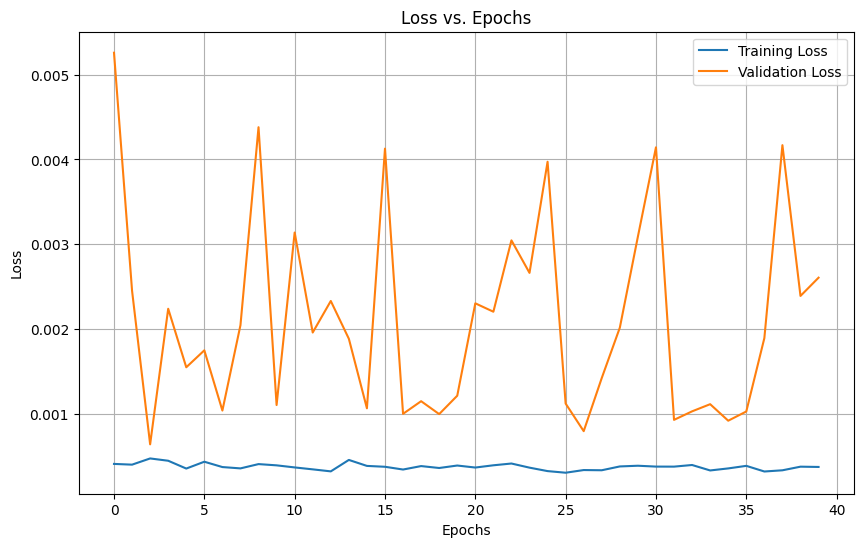

In [166]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()